<a href="https://colab.research.google.com/github/JTumelty/Smart-Health/blob/main/Project-2/JTumelty_ML_SmartHealth_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2
## Instructions:


1.   Select a heart disease database (e.g. MIT-BIH Arrhythmia Database) from Physionet and read the dataset descriptions to identify the beat types (N,V,S,F,Q).
2.   The dataset has been processed and prepared for you and is available at https://drive.google.com/drive/folders/159WV3PR3x5vpWwbbsjCXK5k4tgaNn0Ut?usp=sharing
3. Train your machine learning models on the train set (mitbih_train)
4. Evaluate your model on the test set (mitbih_test)
5. Identify/ rank the important features (optional)
6. Upload/Pull request your notebook on Smart Health course Github Project-2 branch.



## Part 1
From https://archive.physionet.org/physiobank/database/html/mitdbdir/intro.htm#annotations, we can interpret the different types of beats via

*   N: Normal beat (0)
*   V: Premature ventricular contraction (1)
*   S: Supraventricular premature beat (2)
*   F: Fusion of ventricular and normal beat (3)
*   Q: Unclassifiable beat (4)



# Part 2
Download the processed dataset from https://drive.google.com/drive/folders/159WV3PR3x5vpWwbbsjCXK5k4tgaNn0Ut?usp=sharing.


In [1]:
# Use code from: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
# to access data from Google Drive in this notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
# Download training data
import pandas as pd
train_id = '1RU-2LylB_GyZQGEYSnJG8kKYv_z6nPDF'
downloaded = drive.CreateFile({'id':train_id}) 
downloaded.GetContentFile('mitbih_train.csv')  
train = pd.read_csv('mitbih_train.csv', header=None)
train.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Download test data
test_id = '1hx4E06B2KXFavgSoxNjX7VcVVSh0S5w0'
downloaded = drive.CreateFile({'id':test_id})
downloaded.GetContentFile('mitbih_test.csv')
test = pd.read_csv('mitbih_test.csv', header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,0.030992,0.028926,0.035124,0.026860,0.039256,0.035124,0.043388,0.047521,0.053719,0.053719,0.070248,0.072314,0.084711,0.097107,0.121901,0.132231,0.169421,0.196281,0.214876,0.235537,0.254132,0.264463,0.285124,0.272727,0.266529,0.239669,0.214876,0.173554,0.157025,0.123967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,0.304029,0.336996,0.377289,0.391941,0.439560,0.446886,0.457875,0.479853,0.512821,0.534799,0.586081,0.586081,0.604396,0.633700,0.615385,0.582418,0.564103,0.520147,0.490842,0.490842,0.468864,0.454212,0.450549,0.465201,0.450549,0.432234,0.424908,0.410256,0.391941,0.369963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,0.106195,0.141593,0.128319,0.150442,0.132743,0.150442,0.132743,0.150442,0.123894,0.163717,0.137168,0.141593,0.132743,0.150442,0.128319,0.146018,0.119469,0.123894,0.101770,0.092920,0.070796,0.079646,0.066372,0.070796,0.079646,0.092920,0.088496,0.084071,0.079646,0.088496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,0.102083,0.122917,0.150000,0.168750,0.172917,0.170833,0.168750,0.164583,0.156250,0.152083,0.147917,0.147917,0.145833,0.145833,0.141667,0.141667,0.147917,0.158333,0.168750,0.179167,0.191667,0.206250,0.220833,0.239583,0.258333,0.275000,0.287500,0.308333,0.320833,0.331250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,0.080537,0.104027,0.093960,0.117450,0.097315,0.134228,0.124161,0.161074,0.171141,0.194631,0.204698,0.261745,0.275168,0.332215,0.345638,0.395973,0.406040,0.456376,0.446309,0.446309,0.399329,0.369128,0.308725,0.295302,0.265101,0.271812,0.258389,0.268456,0.261745,0.281879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Rename final column to be label
train = train.rename(columns={187: "Label"})
test = test.rename(columns={187: "Label"})

Check how many records are within each category:

In [5]:
print('Training data: \n Count: \n',train.groupby(by='Label').count()[1],'\n\n Proportion:',train.groupby(by='Label').count()[1]/train.shape[0],'\n\n')
print('Test data: \n Count: \n',test.groupby(by='Label').count()[1], '\n\n Proportion:',test.groupby(by='Label').count()[1]/test.shape[0])

Training data: 
 Count: 
 Label
0.0    72471
1.0     2223
2.0     5788
3.0      641
4.0     6431
Name: 1, dtype: int64 

 Proportion: Label
0.0    0.827729
1.0    0.025390
2.0    0.066108
3.0    0.007321
4.0    0.073452
Name: 1, dtype: float64 


Test data: 
 Count: 
 Label
0.0    18118
1.0      556
2.0     1448
3.0      162
4.0     1608
Name: 1, dtype: int64 

 Proportion: Label
0.0    0.827608
1.0    0.025397
2.0    0.066143
3.0    0.007400
4.0    0.073451
Name: 1, dtype: float64


Hence, we see that the test data has similar proportions of records within each category, so the data perparation has been achieved well. 

Now choose a small number of signals in each of the categories to plot the profile for:

In [6]:
rec0 = train.loc[train['Label']==0.0].sample(n=5)
rec1 = train.loc[train['Label']==1.0].sample(n=5)
rec2 = train.loc[train['Label']==2.0].sample(n=5)
rec3 = train.loc[train['Label']==3.0].sample(n=5)
rec4 = train.loc[train['Label']==4.0].sample(n=5)

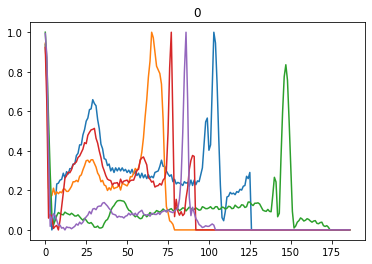

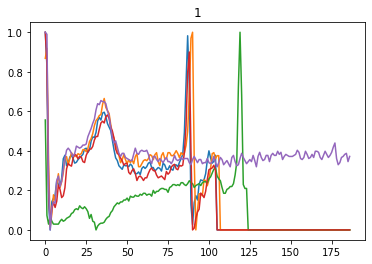

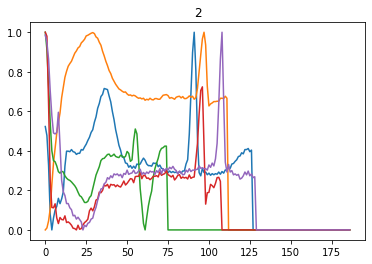

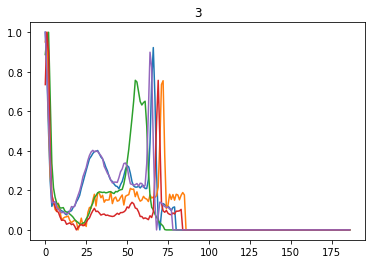

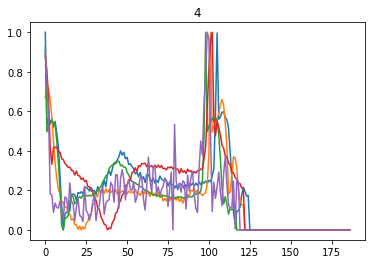

In [7]:
import matplotlib.pyplot as plt

for i in range(5):
  plt.plot(rec0.values[i][:-1])
plt.title('0')
plt.show()

for i in range(5):
  plt.plot(rec1.values[i][:-1])
plt.title('1')
plt.show()

for i in range(5):
  plt.plot(rec2.values[i][:-1])
plt.title('2')
plt.show()

for i in range(5):
  plt.plot(rec3.values[i][:-1])
plt.title('3')
plt.show()

for i in range(5):
  plt.plot(rec4.values[i][:-1])
plt.title('4')
plt.show()

Note that we have different time periods where the signal is 0 at the end of the beat, which may be a useful consideration in the model (but could be accounted for using feature engineering: scale the beat to 1, and include the length of the beat).

## Parts 3--5
Train some machine learning models and evaluate these models on the test data. Obtain the most important features in the classification.

In [8]:
# Separate labels from the data used to obtain the label
X_train = train.drop('Label',axis=1)
Y_train = train['Label']

X_test = test.drop('Label',axis=1)
Y_test = test['Label']

In [9]:
# Import machine learning modules
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, make_scorer
from warnings import simplefilter
from sklearn.metrics import confusion_matrix

#### Logistic regression
Start by using a logistic regression model to classify the beat types.

In [10]:
# instatiate a linear model and check cross-validation using stratified K-fold performance
simplefilter("ignore")
model_log_reg = LogisticRegression()
skf = StratifiedKFold(n_splits=5)
cv_score = cross_val_score(model_log_reg, X_train, Y_train, cv=skf)
print(cv_score)
print(cv_score.mean())

[0.9089715  0.91439666 0.91405402 0.91039918 0.91496288]
0.9125568495560318


In [11]:
# Fit the model using the training data
model_log_reg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
# Check the accuracy of the model and obtain the confusion matrix.
Y_predicted= model_log_reg.predict(X_train)
accuracy = accuracy_score(Y_train, Y_predicted)
print('Accuracy of Logistic Regression model: ',accuracy,'\n')
conf_mat = pd.DataFrame(data=confusion_matrix(Y_train, Y_predicted), columns=["N_pred","S_pred","F_pred","V_pred","Q_pred"], index=["N_true","S_true","F_true","V_true","Q_true"])
conf_mat.head()


Accuracy of Logistic Regression model:  0.913447700847477 



,N_pred,S_pred,F_pred,V_pred,Q_pred
N_true,71314,89,859,43,166
S_true,1220,895,100,1,7
F_true,3573,55,1998,59,103
V_true,476,0,30,135,0
Q_true,721,2,74,0,5634


It initially appears that the model gives a reasonable accuracy (91%), but by obtaining the confusion matrix, we see how a large proportion of signals were misclassifed as normal, owing to the imbalance of the dataset. 

We will therefore try other approaches to improve the accuracy. Nevertheless, we will apply this model to the test data set as a starting point.

In [13]:
# Apply the model on the test dataset and check the accuracy.
Y_test_predicted= model_log_reg.predict(X_test)
accuracy = accuracy_score(Y_test, Y_test_predicted)
print('Accuracy of Logistic Regression model on test dataset: ',accuracy,'\n')
conf_mat = pd.DataFrame(data=confusion_matrix(Y_test, Y_test_predicted), columns=["N_pred","S_pred","F_pred","V_pred","Q_pred"], index=["N_true","S_true","F_true","V_true","Q_true"])
conf_mat.head()

Accuracy of Logistic Regression model on test dataset:  0.9117029051708386 



,N_pred,S_pred,F_pred,V_pred,Q_pred
N_true,17832,26,207,14,39
S_true,327,197,32,0,0
F_true,900,11,483,26,28
V_true,107,0,8,47,0
Q_true,186,0,22,0,1400


The dataset is imbalanced, so ahead of applying more complicated machinne learning models, we will try to initially deal with the imbalance. In particular, we use the f1 score as a measure of accuracy.

In [14]:
def disp_cv_score(model,X_train,Y_train):
  '''Cross validation with 5-fold stratification, evaluating performance using f1 score'''
  cv = StratifiedKFold(n_splits=5, shuffle=False) 
  cv_score_total = 0
  kf = 0
  for train_index, test_index in cv.split(X_train,Y_train):
          X1_train, X1_test = X_train.iloc[train_index], X_train.iloc[test_index]
          Y1_train, Y1_test = Y_train.iloc[train_index], Y_train.iloc[test_index]
          model.fit(X1_train, Y1_train)
          y_pred = model.predict(X1_test)
          score = f1_score(Y1_test, y_pred, average='macro')
          cv_score_total += score
          kf += 1
          print('KFold ',kf,' F1 score: ', score,'\n\n')

  print('Average F1 score: ',cv_score_total/5)

In [15]:
# Evaluate simple logistic regression model on training data using F1 score
simplefilter("ignore")
model_log_reg = LogisticRegression()
disp_cv_score(model_log_reg,X_train,Y_train)

KFold  1  F1 score:  0.607764019062569 


KFold  2  F1 score:  0.6392333953074396 


KFold  3  F1 score:  0.6307985892735826 


KFold  4  F1 score:  0.6340405047675358 


KFold  5  F1 score:  0.631838851799899 


Average F1 score:  0.6287350720422052


As the score with this measure is low (~0.63), we should look at dealing with the imbalance in order to improve the classification model.

#### Addressing the imbalance in the data using over and under sampling

We may try undersampling or oversampling in order to make a more balanced training dataset. The following code is based from the tutorial: https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/.

In [16]:
!pip install imbalanced-learn
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline 

In [17]:
def classification_model_score(model,X_train,Y_train):
  '''Function to evaluate performance of classification model with undersampling.'''
  # Apply cross-validation to evaluate the accuracy of the model.
  disp_cv_score(model,X_train,Y_train)
  # Fit the model to the training data and evaluate its performancee
  model.fit(X_train, Y_train)
  Y_predicted= model.predict(X_train)
  accuracy = f1_score(Y_train, Y_predicted, average = 'macro')
  print('Accuracy of Logistic Regression model: ',accuracy,'\n')
  # Display the confusion matrix
  conf_mat = pd.DataFrame(data=confusion_matrix(Y_train, Y_predicted), columns=["N_pred","S_pred","F_pred","V_pred","Q_pred"], index=["N_true","S_true","F_true","V_true","Q_true"])
  print(conf_mat.head())

Start with an undersampling strategy that decreases the number of records in the majority class (normal heart beats)

In [18]:
import numpy as np
# Define undersample strategy
undersample = RandomUnderSampler()
# Fit and apply the transform
X_under, Y_under = undersample.fit_resample(X_train,Y_train)
model_log_reg = LogisticRegression()

# Note that the function disp_cv_score requires training data to be in a pandas dataframe format, rather tahn a numpy array
classification_model_score(model_log_reg,pd.DataFrame(data=X_under),pd.DataFrame(data=Y_under))

Y_predicted= model_log_reg.predict(X_train)
accuracy = f1_score(Y_train, Y_predicted, average = 'macro')
print('Accuracy of Logistic Regression model on full dataset: ',accuracy,'\n')
conf_mat = pd.DataFrame(data=confusion_matrix(Y_train, Y_predicted), columns=["N_pred","S_pred","F_pred","V_pred","Q_pred"], index=["N_true","S_true","F_true","V_true","Q_true"])
print(conf_mat.head())

KFold  1  F1 score:  0.756720296256912 


KFold  2  F1 score:  0.7663084978942589 


KFold  3  F1 score:  0.7447416522424203 


KFold  4  F1 score:  0.7417898713934153 


KFold  5  F1 score:  0.7857998106628878 


Average F1 score:  0.7590720256899789
Accuracy of Logistic Regression model:  0.7965845635206592 

        N_pred  S_pred  F_pred  V_pred  Q_pred
N_true     447      62      67      46      19
S_true     137     451      29      18       6
F_true      38      23     510      53      17
V_true      43       4      34     558       2
Q_true      20       0      30       5     586
Accuracy of Logistic Regression model on full dataset:  0.4716065755997538 

        N_pred  S_pred  F_pred  V_pred  Q_pred
N_true   45120    9530    9835    6232    1754
S_true     524    1511     107      64      17
F_true     494     301    4292     476     225
V_true      43       4      34     558       2
Q_true     303      14     285      27    5802


We see while using 'majority' as the undersampling strategy improves the performance of the model on the resampled training data, but reduces it on the full training data as many normal heart beats are classified as not normal. 

Next, we will try oversampling the minority classes

In [19]:
import numpy as np
# Define undersample strategy
oversample = RandomOverSampler()
# Fit and apply the transform
X_over, Y_over = oversample.fit_resample(X_train,Y_train)
model_log_reg = LogisticRegression()

# Note that the function disp_cv_score requires training data to be in a pandas dataframe format, rather than a numpy array
classification_model_score(model_log_reg,pd.DataFrame(data=X_over),pd.DataFrame(data=Y_over))

Y_predicted= model_log_reg.predict(X_train)
accuracy = f1_score(Y_train, Y_predicted, average = 'macro')
print('Accuracy of Logistic Regression model on full dataset: ',accuracy,'\n')
conf_mat = pd.DataFrame(data=confusion_matrix(Y_train, Y_predicted), columns=["N_pred","S_pred","F_pred","V_pred","Q_pred"], index=["N_true","S_true","F_true","V_true","Q_true"])
print(conf_mat.head())

KFold  1  F1 score:  0.7769969415257341 


KFold  2  F1 score:  0.775883947189825 


KFold  3  F1 score:  0.7784042980935425 


KFold  4  F1 score:  0.776675847204914 


KFold  5  F1 score:  0.7748795100230135 


Average F1 score:  0.7765681088074057
Accuracy of Logistic Regression model:  0.7782409381126512 

        N_pred  S_pred  F_pred  V_pred  Q_pred
N_true   46024    9214    9860    5534    1839
S_true   14192   52177    3332    1852     918
F_true    6786    2731   55097    5951    1906
V_true    5116     628    4006   62498     223
Q_true    2490     277    3377     264   66063
Accuracy of Logistic Regression model on full dataset:  0.48196260096293886 

        N_pred  S_pred  F_pred  V_pred  Q_pred
N_true   46024    9214    9860    5534    1839
S_true     434    1602     102      57      28
F_true     545     221    4395     471     156
V_true      44       6      36     553       2
Q_true     218      24     300      26    5863


Oversampling does not appear to provide better performance than undersampling. We will now try to oversample minority classes and undersample the majority class, initially using the default options and subsequently by defining the number of records of each type used in the sampling strategy.

In [21]:
# Try combining under and over sampling
over = RandomOverSampler()
under = RandomUnderSampler()
model_log_reg = LogisticRegression()
pipeline = Pipeline(steps=[('o', over), ('u', under)])
X_resampled, Y_resampled = pipeline.fit_resample(X_train, Y_train)
classification_model_score(model_log_reg,pd.DataFrame(data=X_resampled),pd.DataFrame(data=Y_resampled))

n = Y_train.shape[0]
over = RandomOverSampler()
under = RandomUnderSampler()
model_log_reg = LogisticRegression()
pipeline = Pipeline(steps=[('o', over), ('u', under)])
X_resampled, Y_resampled = pipeline.fit_resample(X_train, Y_train)
model_log_reg.fit(X_resampled,Y_resampled)

Y_predicted= model_log_reg.predict(X_resampled)
accuracy = f1_score(Y_resampled, Y_predicted, average = 'macro')
print('Accuracy of Logistic Regression model on full dataset: ',accuracy,'\n')
conf_mat = pd.DataFrame(data=confusion_matrix(Y_resampled, Y_predicted), columns=["N_pred","S_pred","F_pred","V_pred","Q_pred"], index=["N_true","S_true","F_true","V_true","Q_true"])
print(conf_mat.head())

Y_predicted= model_log_reg.predict(X_train)
accuracy = f1_score(Y_train, Y_predicted, average = 'macro')
print('Accuracy of Logistic Regression model on full dataset: ',accuracy,'\n')
conf_mat = pd.DataFrame(data=confusion_matrix(Y_train, Y_predicted), columns=["N_pred","S_pred","F_pred","V_pred","Q_pred"], index=["N_true","S_true","F_true","V_true","Q_true"])
print(conf_mat.head())

KFold  1  F1 score:  0.7790761936496138 


KFold  2  F1 score:  0.7774970682159846 


KFold  3  F1 score:  0.7801023117217093 


KFold  4  F1 score:  0.7733191098592779 


KFold  5  F1 score:  0.7777254987944914 


Average F1 score:  0.7775440364482153
Accuracy of Logistic Regression model:  0.7785384764546524 

        N_pred  S_pred  F_pred  V_pred  Q_pred
N_true   46606    8939    9518    5296    2112
S_true   13955   52426    3283    1806    1001
F_true    7216    2789   54187    6046    2233
V_true    5007     698    4083   62435     248
Q_true    2224     268    3351     269   66359
Accuracy of Logistic Regression model on full dataset:  0.7775358101858071 

        N_pred  S_pred  F_pred  V_pred  Q_pred
N_true   45394    9410   10215    5551    1901
S_true   13853   52800    2932    1905     981
F_true    6932    2679   54881    5858    2121
V_true    5222     634    3895   62459     261
Q_true    2261     307    3424     326   66153
Accuracy of Logistic Regression model on full

In [25]:
def sampling_strat_dict(frac_maj):
  '''Defined the dictionaries for sampling strategy:
   {0:frac_maj*n,
   1:(1-frac_maj)*n*prop1,
   2:(1-frac_maj)*n*prop2,...}
   where n is the total number of records and propi is the number of records 
   classified as i for i = 1,2,3,4'''
  frac_min = 1- frac_maj
  frac_max = max(frac_maj,frac_min)
  n = Y_train.shape[0]
  init_prop = dict(zip([0,1,2,3,4],(train.groupby(by='Label').count()[1]/train.shape[0]).values))
  init_tot = dict(zip([0,1,2,3,4],(train.groupby(by='Label').count()[1]).values))

  # Find the total proportion that the minority of beats contribute
  minority_tot = init_prop[1]+init_prop[2]+init_prop[3]+init_prop[4]
  # Find total normal beats in train data
  n0 = init_tot[0]

  over_dict = {}
  under_dict = {}
  over_dict[0] = round(n)
  under_dict[0] = round(n*frac_min)
  for i in range(1,5):
    under_dict[i] = round(frac_min*n*init_prop[i]/minority_tot)
    over_dict[i] = round(frac_max*n*init_prop[i]/minority_tot)

  print('Oversampling strategy: ',over_dict)
  print('Undersampling strategy: ',under_dict)

  # Return dictionaries that provide the number of records in the sampling strategy
  return over_dict, under_dict


In [26]:
def model_log_reg_sampling(frac,X_train,Y_train):
  '''Function to evaluate a logistic regression model on the resampled and training
  dataset with sampling strategy with frac_maj = frac'''
  # Defing the dictionaries to provide number of samples in the under and oversampling
  over_dict, under_dict = sampling_strat_dict(frac)

  # Resample the data based on the above resampling strategy
  over = RandomOverSampler(sampling_strategy=over_dict)
  under = RandomUnderSampler(sampling_strategy = under_dict)
  pipeline = Pipeline(steps=[('o', over), ('u', under)])
  X_resampled, Y_resampled = pipeline.fit_resample(X_train, Y_train)
  
  # Define logistic regression model and fit it using resampled data
  model_log_reg = LogisticRegression()
  model_log_reg.fit(X_resampled,Y_resampled)

  # Evaluate the performance of the model on resampled data
  Y_predicted= model_log_reg.predict(X_resampled)
  accuracy = f1_score(Y_resampled, Y_predicted, average = 'macro')
  print('Accuracy of Logistic Regression model on sampled dataset with fraction ',frac,': ',accuracy,'\n')
  conf_mat = pd.DataFrame(data=confusion_matrix(Y_resampled, Y_predicted), columns=["N_pred","S_pred","F_pred","V_pred","Q_pred"], index=["N_true","S_true","F_true","V_true","Q_true"])
  print(conf_mat.head())

  # Evaluate the performance of the model on the full training set
  Y_predicted= model_log_reg.predict(X_train)
  accuracy = f1_score(Y_train, Y_predicted, average = 'macro')
  print('Accuracy of Logistic Regression model on full dataset with fraction ',frac,': ',accuracy,'\n')
  conf_mat = pd.DataFrame(data=confusion_matrix(Y_train, Y_predicted), columns=["N_pred","S_pred","F_pred","V_pred","Q_pred"], index=["N_true","S_true","F_true","V_true","Q_true"])
  print(conf_mat.head())

  # Return the logistic regression model
  return model_log_reg

In [29]:
print('Fraction: 0.5')
model_log_reg_05 = model_log_reg_sampling(0.5,X_train,Y_train)
print('\n Fraction: 0.7')
model_log_reg_07 = model_log_reg_sampling(0.7,X_train,Y_train)
print('\n Fraction: 0.3')
model_log_reg_03 = model_log_reg_sampling(0.3,X_train,Y_train)

Fraction: 0.5
Oversampling strategy:  {0: 87554, 1: 6452, 2: 16799, 3: 1860, 4: 18665}
Undersampling strategy:  {0: 43777, 1: 6452, 2: 16799, 3: 1860, 4: 18665}
Accuracy of Logistic Regression model on sampled dataset with fraction  0.5 :  0.7363203088671535 

        N_pred  S_pred  F_pred  V_pred  Q_pred
N_true   39650     309    3080     188     550
S_true    2392    3570     399      14      77
F_true    4473     203   11298     289     536
V_true     887      10     114     845       4
Q_true    1259       3     583       0   16820
Accuracy of Logistic Regression model on full dataset with fraction  0.5 :  0.6704902370818397 

        N_pred  S_pred  F_pred  V_pred  Q_pred
N_true   65478     487    5338     305     863
S_true     812    1240     146       5      20
F_true    1555      72    3876      99     186
V_true     306       4      40     290       1
Q_true     441       1     196       0    5793

 Fraction: 0.7
Oversampling strategy:  {0: 87554, 1: 9033, 2: 23519, 3: 2605,

We see that the model had improved performance (as measured using the F1 score) when a combination of under and oversampling was used. The variation in performance was only marginal with different fractions were used and we believe that it can be improved using other methods. 

### Alternative classification models with improved performance

Having seen that the performance of logistic regression models does not improve significantly through changing the sampling strategy, we will try using one further classifier:

*   Random Forests

In [30]:
# load library
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# Fit the predictor on 5 subsets of training data using stratified K-fold
cv = StratifiedKFold(n_splits=5, shuffle=False) 
cv_score_total = 0
ac_score_total = 0
kf = 0
for train_index, test_index in cv.split(X_train,Y_train):
       X1_train, X1_test = X_train.iloc[train_index], X_train.iloc[test_index]
       Y1_train, Y1_test = Y_train.iloc[train_index], Y_train.iloc[test_index]
       rfc.fit(X1_train, Y1_train)
       y_pred = rfc.predict(X1_test)
       score = f1_score(Y1_test, y_pred, average='macro')
       acc_score = accuracy_score(Y1_test, y_pred)
       cv_score_total += score
       ac_score_total += acc_score
       kf += 1
       print('KFold ',kf,' F1 score: ', score)
       print('KFold ',kf,' accuracy score: ', acc_score,'\n\n')

print('Average F1 score: ',cv_score_total/5)
print('Average accuracy score: ',ac_score_total/5)


KFold  1  F1 score:  0.8740851951599236
KFold  1  accuracy score:  0.9740734395522814 


KFold  2  F1 score:  0.8785397474265617
KFold  2  accuracy score:  0.9772714293872423 


KFold  3  F1 score:  0.8742630482763014
KFold  3  accuracy score:  0.9741876534749586 


KFold  4  F1 score:  0.8767277668272142
KFold  4  accuracy score:  0.9742447604362972 


KFold  5  F1 score:  0.8688270278369433
KFold  5  accuracy score:  0.9743003997715591 


Average F1 score:  0.8744885571053886
Average accuracy score:  0.9748155365244677


These accuracy scores imply that random forests give improved performance over the logistic regression model. We will now fit the random forest classifier on the full training data to obtain the confusion matrix.

In [32]:
# Initialise Random Forest Classifier
rfc = RandomForestClassifier()

# Fit to training data
rfc.fit(X_train, Y_train)
# Predict training data
Y_pred = rfc.predict(X_train)
# Evaluate performance using F1 and accuracy scores
score = f1_score(Y_train, Y_pred, average='macro')
acc_score = accuracy_score(Y_train, Y_pred)
print('F1 score using random forest classifier: ', score)
print('Accuracy score using random forest classifier: ', acc_score,'\n\n')
# Display confusion matrix
conf_mat = pd.DataFrame(data=confusion_matrix(Y_train, Y_predicted), columns=["N_pred","S_pred","F_pred","V_pred","Q_pred"], index=["N_true","S_true","F_true","V_true","Q_true"])
print(conf_mat.head())

F1 score using random forest classifier:  0.9999536257715272
Accuracy score using random forest classifier:  0.9999885784772826 


        N_pred  S_pred  F_pred  V_pred  Q_pred
N_true   45394    9410   10215    5551    1901
S_true     423    1621      90      58      31
F_true     547     220    4380     476     165
V_true      46       6      35     552       2
Q_true     197      29     308      28    5869


We note the high performance, which arises because we are predicting based on the full dataset that was used to fit the classsifier

We will now apply this fitted classifier to the test data and evaluate its performance.

In [34]:
# Predict test data
Y_pred = rfc.predict(X_test)
# Evaluate performance using F1 and accuracy scores
score = f1_score(Y_test, Y_pred, average='macro')
acc_score = accuracy_score(Y_test, Y_pred)
print('F1 score using random forest classifier: ', score)
print('Accuracy score using random forest classifier: ', acc_score,'\n\n')
# Display confusion matrix
conf_mat = pd.DataFrame(data=confusion_matrix(Y_test, Y_pred), columns=["N_pred","S_pred","F_pred","V_pred","Q_pred"], index=["N_true","S_true","F_true","V_true","Q_true"])
print(conf_mat.head())

F1 score using random forest classifier:  0.8741928320566587
Accuracy score using random forest classifier:  0.9750137036360315 


        N_pred  S_pred  F_pred  V_pred  Q_pred
N_true   18100       6      10       0       2
S_true     216     338       1       0       1
F_true     145       1    1283      14       5
V_true      48       0      12     102       0
Q_true      83       0       3       0    1522


We observe that performance on the data set is comparable with each of the stratified folds, and the main form of error arises from incorrectly classifying abnormal heart beats as normal. 

Finally, we will examine the most important features that were used in determining the classification.

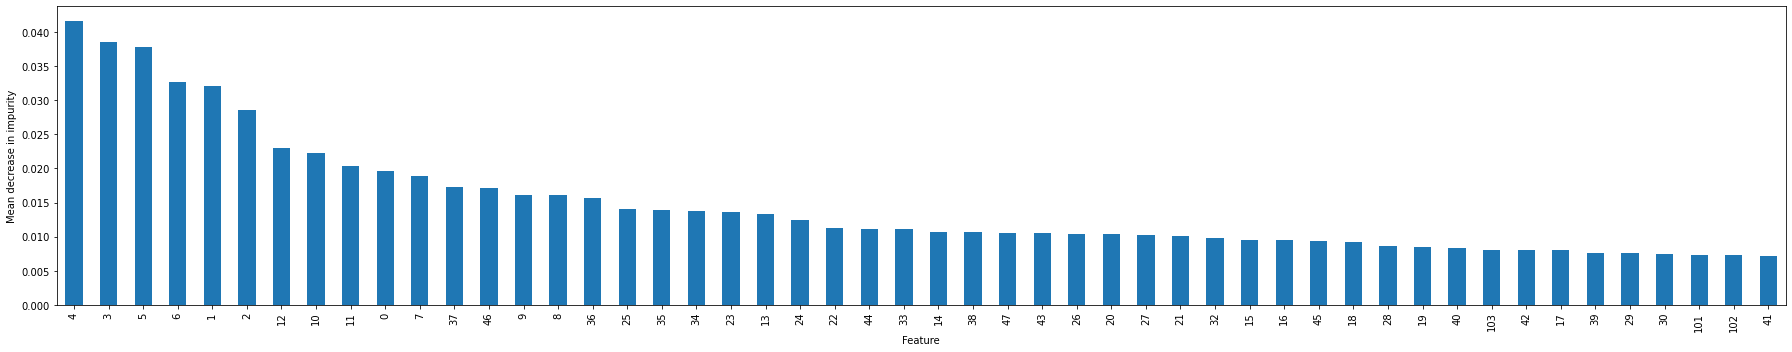

In [93]:
# Obtain feature importance in a dictionary so that features may be ordered in
# decreasing importance
important_features_dict = {}
for idx, val in enumerate(rfc.feature_importances_):
    important_features_dict[idx] = val

# Sort feature impotance in descending order
forest_importances = pd.Series([val for val in important_features_dict.values()]).sort_values(ascending=False)

# Plot feature importance as bar chart
fig, ax = plt.subplots(figsize = (25,5))
forest_importances[:50].plot.bar(ax=ax)
ax.set_xlabel('Feature')
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

We see that the first features in each records are the most important in classifying the beat type. However, we note that the maximum value for the mean decrease in impuriy is 0.0417, which is small and there is a slow drop off in decrease of importance. This is likely because of the time series nature of the records. We should finally note that few of the later features are important in the classification, which makes sense as we earlier saw that many of the signals had a string of 0s towards the end.

## Final remarks
We found that the random forest classifier greatly outperformed the logistic regression model and techniques to resample the training data did not greatly improve the performance of the model.

Owing to time constraints, only a small number of classification methods models were attempted and further I did not analyse whether the models were appropriate to apply in this problem. The performance of the classification model can likely be improved using feature engineering, applying different algorithms (e.g. gradient boosting trees, or time series classifying) and tuning parameters.